In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
from tqdm import tqdm
import datetime
import proplot as plot
from netCDF4 import Dataset
from wrf import getvar
%matplotlib inline

plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

In [2]:
import pickle
path = './output/peaks_v1/'
file = [path+'ctrl-peaks-02_45',path+'ncrf36-peaks-02_45',path+'ncrf60-peaks-02_45']

output = []
for i in range(len(file)):
    with open(file[i],'rb') as f:
        output.append(pickle.load(f))

indx_dict = {'CTRLMARIA_peaks':output[0],'NCRF36MARIA_peaks':output[1],'NCRF60MARIA_peaks':output[1]}

### Read James' files

In [3]:
origin_path = '/scratch/06040/tg853394/tc/output/redux/maria/'
#Function####################################################
def read_some_azimuth_fields(fileloc=None,fieldname=None):
    dict_name = {}
    for inx,obj in enumerate(fileloc):
        field_read = xr.open_dataset(obj)
        dict_name[fieldname[inx]] = field_read
    return dict_name

def nearest_index(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx.values
#############################################################
ctrlvar_dict = read_some_azimuth_fields(fileloc=[origin_path+'ctl/azim_QVAPOR_0-144hr.nc'],fieldname=['QVAPOR'])
ncrf36var_dict = read_some_azimuth_fields(fileloc=[origin_path+'ncrf_36h/azim_QVAPOR_36-144hr.nc'],fieldname=['QVAPOR'])
ncrf60var_dict = read_some_azimuth_fields(fileloc=[origin_path+'ncrf_60h/azim_QVAPOR_60-144hr.nc'],fieldname=['QVAPOR'])

# Target temporal period
#####################################################################################################################################################
time2_ctrl,time45_ctrl = nearest_index(ctrlvar_dict['QVAPOR']['QVAPOR'].time/24, 2),nearest_index(ctrlvar_dict['QVAPOR']['QVAPOR'].time/24, 4.5)
time2_ncrf36,time45_ncrf36 = nearest_index(ncrf36var_dict['QVAPOR']['QVAPOR'].time/24, 2),nearest_index(ncrf36var_dict['QVAPOR']['QVAPOR'].time/24, 4.5)
time2_ncrf60,time45_ncrf60 = nearest_index(ncrf60var_dict['QVAPOR']['QVAPOR'].time/24, 2),nearest_index(ncrf60var_dict['QVAPOR']['QVAPOR'].time/24, 4.5)

target_i = 3 #4 00-12 18 Sep
target_ctrl,target_ncrf36,target_ncrf60 = time2_ctrl+indx_dict['CTRLMARIA_peaks'][target_i]-28,time2_ncrf36+indx_dict['NCRF36MARIA_peaks'][target_i],\
time2_ncrf60+indx_dict['NCRF60MARIA_peaks'][target_i-2] #CTRL minus 28 -> mytrack start time

### Read my polar

In [5]:
path = './output/polar/'
file = [path+'ctrl_polarRTHRATLW',path+'ctrl_polarRTHRATLWC',path+'ctrl_polarR',path+'ctrl_polarT',\
       path+'NCRF36_polarRTHRATLW',path+'NCRF36_polarRTHRATLWC',path+'NCRF36_polarR',path+'NCRF36_polarT']

output = []
for i in range(len(file)):
    with open(file[i],'rb') as f:
        output.append(pickle.load(f))

indx_dict = {'CTRL_LW':output[0],'CTRL_LWC':output[1],'CTRL_R':output[2],'CTRL_T':output[3],\
            'NCRF36_LW':output[4],'NCRF36_LWC':output[5],'NCRF36_R':output[6],'NCRF36_T':output[7]}

In [8]:
ncrf36_lw = indx_dict['NCRF36_LW'][target_ncrf36-1-12:target_ncrf36-1][:]
ncrf36_lwc = indx_dict['NCRF36_LWC'][target_ncrf36-1-12:target_ncrf36-1][:]

In [24]:
ncrf36_radius,ncrf36_azimuth = indx_dict['NCRF36_R'][0][0],indx_dict['NCRF36_T'][0][0]
ctrl_radius,ctrl_azimuth = indx_dict['CTRL_R'][0][0],indx_dict['CTRL_T'][0][0]
ctrl_lwc = indx_dict['CTRL_LWC'][0][target_ctrl-1-12:target_ctrl-1][:]

In [34]:
ctrl_lw = indx_dict['CTRL_LW'][target_ctrl-1-12:target_ctrl-1][:]

### Average

In [43]:
np.asarray(ctrl_lw).shape

(12, 39, 360, 200)

In [44]:
#np.asarray(ctrl_lw[:][0].copy()).shape
avg_ctrl_lw = np.nanmean(np.asarray(ctrl_lw),axis=0)
avg_ctrl_lwc = np.nanmean(np.asarray(ctrl_lwc),axis=0)
avg_ncrf36_lw = np.nanmean(np.asarray(ncrf36_lw),axis=0)
avg_ncrf36_lwc = np.nanmean(np.asarray(ncrf36_lwc),axis=0)
ctrl_ir,ncrf36_ir = avg_ctrl_lw-avg_ctrl_lwc,avg_ncrf36_lw-avg_ncrf36_lwc

In [48]:
def nearest_index2(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx
# UL
a18,a288=(nearest_index2(ctrl_azimuth,18.22),nearest_index2(ctrl_azimuth,288.22))
r0,r200=(nearest_index2(ctrl_radius,0),nearest_index2(ctrl_radius,200))
r300,r500=(nearest_index2(ctrl_radius,300),nearest_index2(ctrl_radius,500))

In [63]:
avg_ncrf36_lwc

array([[[-1.18811781e-06,  2.01055714e-06, -9.71950434e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.18811781e-06,  1.92635128e-06, -1.11644758e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.18811781e-06,  1.83724077e-06, -1.23059132e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-1.18811781e-06,  2.23122224e-06, -3.45255432e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.18811781e-06,  2.16315980e-06, -5.86028301e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.18811781e-06,  2.08957011e-06, -7.95371924e-07, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.88028084e-05, -1.86641134e-05, -1.89588470e-05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.88028084e-05, -1.86806451e-05, -1.89520694e-05, ...,
          0.00000000e+00,  0.00000000e

In [54]:
ctrl_IR_ul = np.concatenate(((ctrl_ir)[:,int(a288):-1,:],\
                (ctrl_ir)[:,0:int(a18),:]),axis=1)
ncrf36_IR_ul = np.concatenate(((ncrf36_ir)[:,int(a288):-1,:],\
                (ncrf36_ir)[:,0:int(a18),:]),axis=1)
IRctrl_uliprof = np.nanmean((ctrl_IR_ul)[:,:,int(r0):int(r200)],axis=(1,2))
IRncrf36_uliprof = np.nanmean((ncrf36_IR_ul)[:,:,int(r0):int(r200)],axis=(1,2))
IRctrl_uloprof = np.nanmean((ctrl_IR_ul)[:,:,int(r300):int(r500)],axis=(1,2))
IRncrf36_uloprof = np.nanmean((ncrf36_IR_ul)[:,:,int(r300):int(r500)],axis=(1,2))

In [56]:
#DL
a18,a108=nearest_index2(ctrl_azimuth,18.22),nearest_index2(ctrl_azimuth,108.22)
QVctrl_dliprof = np.nanmean((ctrl_ir)[:,int(a18):int(a108),int(r0):int(r200)],axis=(1,2))
QVncrf36_dliprof = np.nanmean((ncrf36_ir)[:,int(a18):int(a108),int(r0):int(r200)],axis=(1,2))
QVctrl_dloprof = np.nanmean((ctrl_ir)[:,int(a18):int(a108),int(r300):int(r500)],axis=(1,2))
QVncrf36_dloprof = np.nanmean((ncrf36_ir)[:,int(a18):int(a108),int(r300):int(r500)],axis=(1,2))

#DR
a108,a198=nearest_index2(ctrl_azimuth,108.22),nearest_index2(ctrl_azimuth,198.22)
QVctrl_driprof = np.nanmean((ctrl_ir)[:,int(a108):int(a198),int(r0):int(r200)],axis=(1,2))
QVncrf36_driprof = np.nanmean((ncrf36_ir)[:,int(a108):int(a198),int(r0):int(r200)],axis=(1,2))
QVctrl_droprof = np.nanmean((ctrl_ir)[:,int(a108):int(a198),int(r300):int(r500)],axis=(1,2))
QVncrf36_droprof = np.nanmean((ncrf36_ir)[:,int(a108):int(a198),int(r300):int(r500)],axis=(1,2))

#UR
a198,a288=nearest_index2(ctrl_azimuth,198.22),nearest_index2(ctrl_azimuth,288.22)
QVctrl_uriprof = np.nanmean((ctrl_ir)[:,int(a198):int(a288),int(r0):int(r200)],axis=(1,2))
QVncrf36_uriprof = np.nanmean((ncrf36_ir)[:,int(a198):int(a288),int(r0):int(r200)],axis=(1,2))
QVctrl_uroprof = np.nanmean((ctrl_ir)[:,int(a198):int(a288),int(r300):int(r500)],axis=(1,2))
QVncrf36_uroprof = np.nanmean((ncrf36_ir)[:,int(a198):int(a288),int(r300):int(r500)],axis=(1,2))

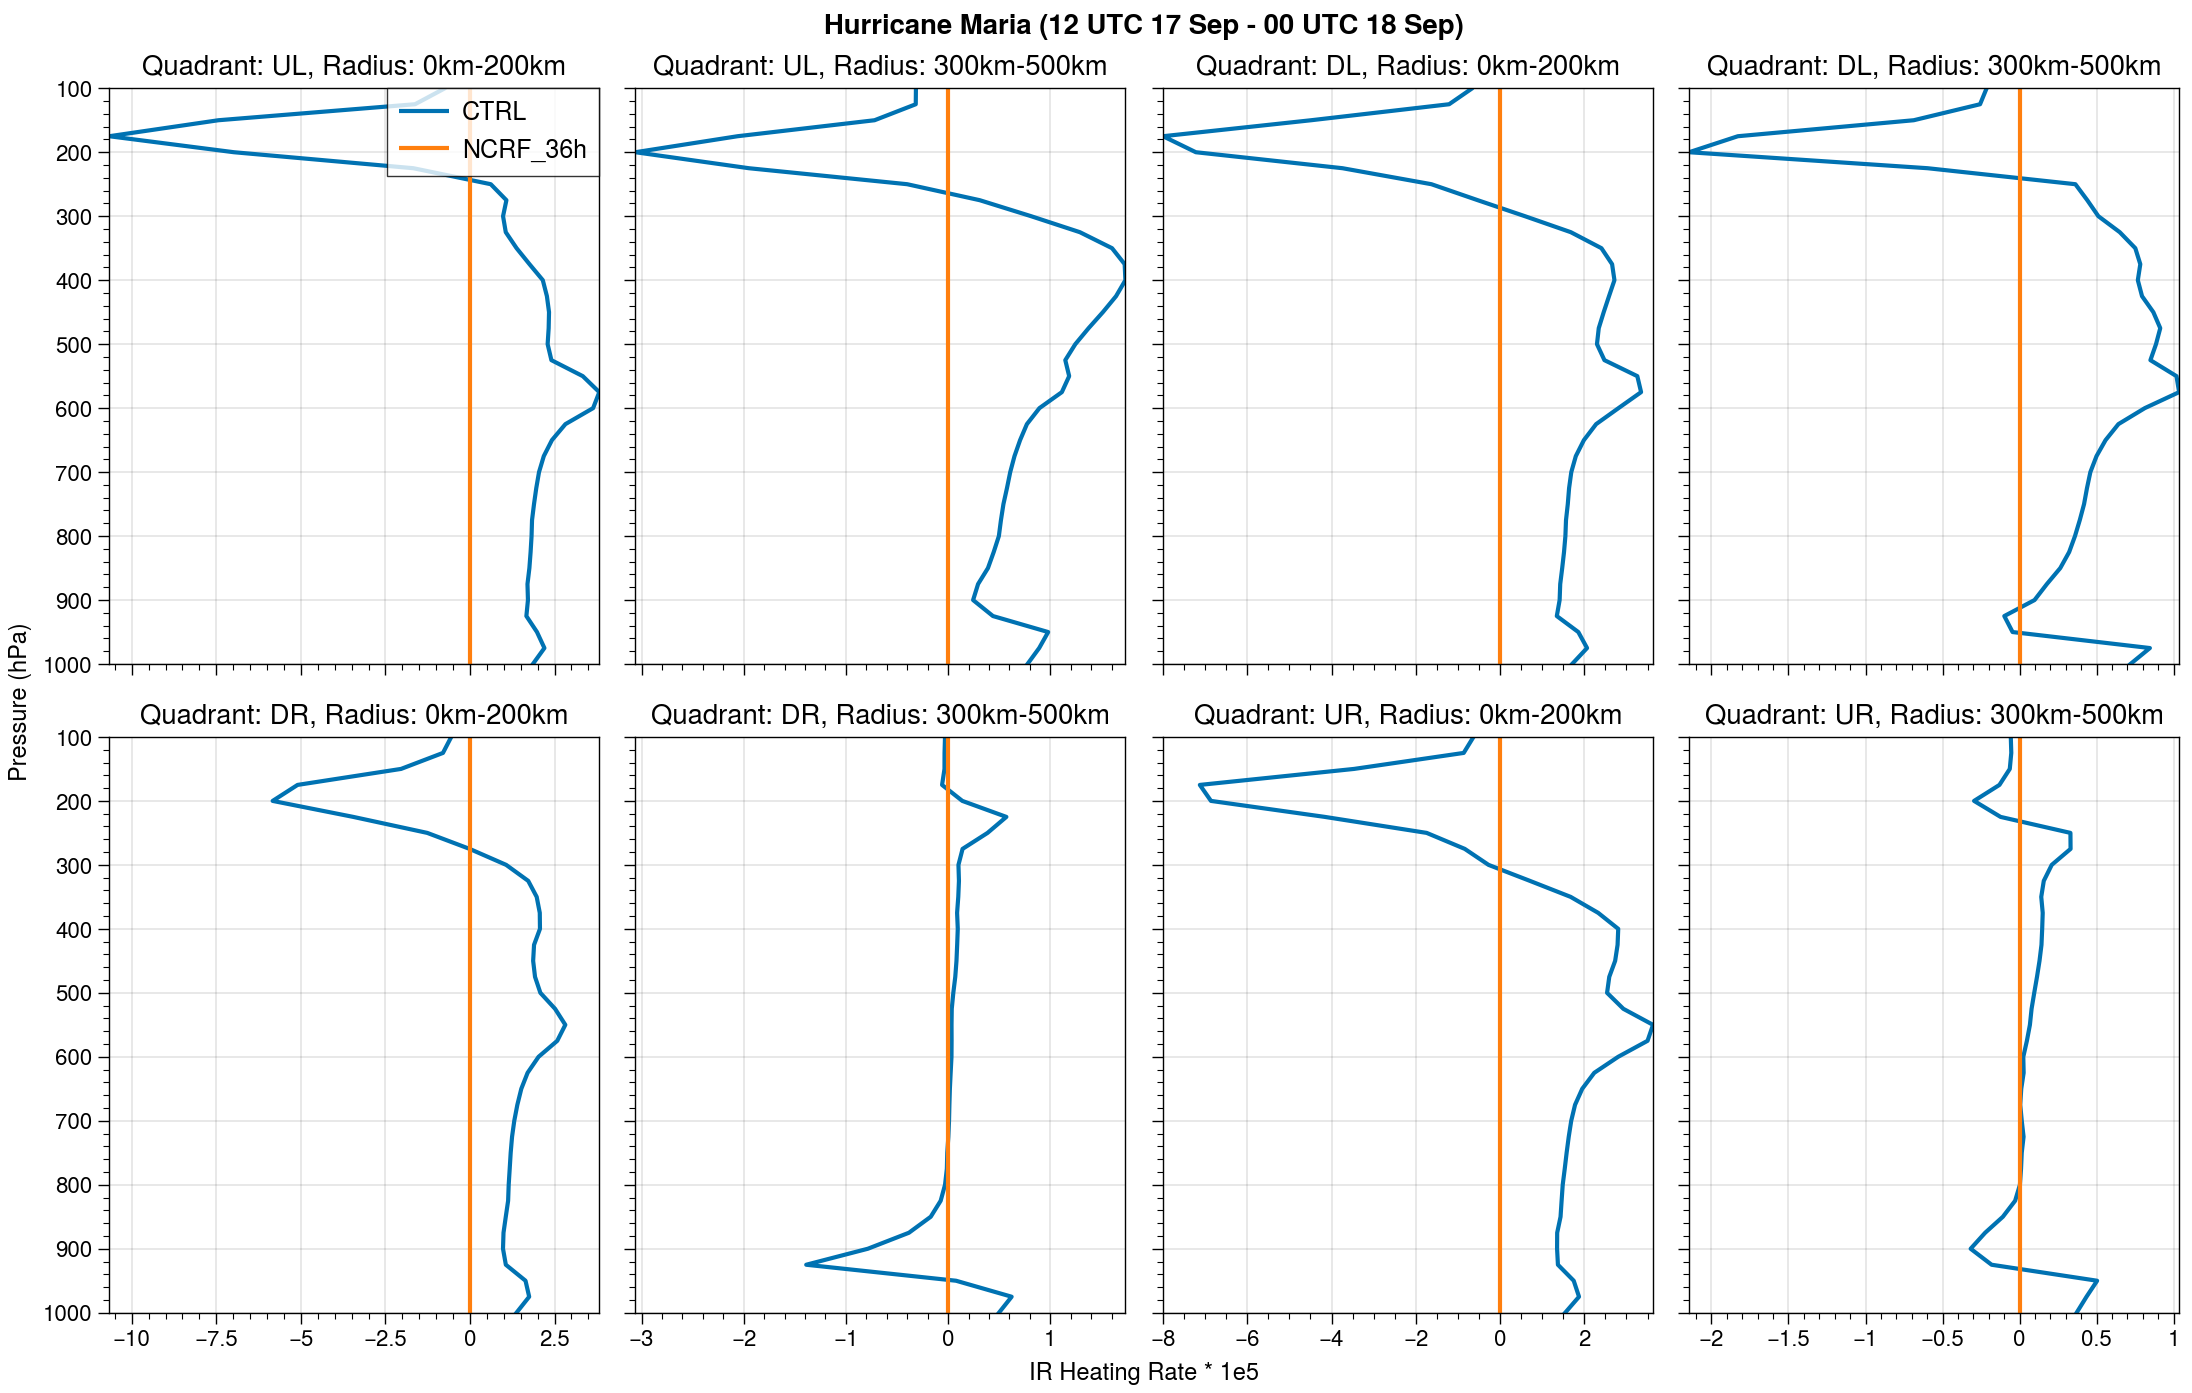

In [65]:
path_coor = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/post/U.nc'
coor = xr.open_dataset(path_coor)

fig,axs = plot.subplots(ncols=4,nrows=2,axwidth=2.45,refaspect=0.851,span=True)
# UL
axs[0].plot(IRctrl_uliprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[0].plot(IRncrf36_uliprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[0].format(title='Quadrant: UL, Radius: 0km-200km')
axs[0].legend(loc='ur',ncols=1)
axs[1].plot(IRctrl_uloprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[1].plot(IRncrf36_uloprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[1].format(title='Quadrant: UL, Radius: 300km-500km')

#DL
axs[2].plot(QVctrl_dliprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[2].plot(QVncrf36_dliprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[2].format(title='Quadrant: DL, Radius: 0km-200km')
axs[3].plot(QVctrl_dloprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[3].plot(QVncrf36_dloprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[3].format(title='Quadrant: DL, Radius: 300km-500km')

#DR
axs[4].plot(QVctrl_driprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[4].plot(QVncrf36_driprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[4].format(title='Quadrant: DR, Radius: 0km-200km')
axs[5].plot(QVctrl_droprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[5].plot(QVncrf36_droprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[5].format(title='Quadrant: DR, Radius: 300km-500km')

#UR
axs[6].plot(QVctrl_uriprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[6].plot(QVncrf36_uriprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[6].format(title='Quadrant: UR, Radius: 0km-200km')
axs[7].plot(QVctrl_uroprof*1e5,coor.pres,lw=1.5,label='CTRL')
axs[7].plot(QVncrf36_uroprof*1e5,coor.pres,lw=1.5,color='#ff7f0e',label='NCRF_36h')
axs[7].format(title='Quadrant: UR, Radius: 300km-500km')

axs.format(xlabel='IR Heating Rate * 1e5',ylabel='Pressure (hPa)',\
           suptitle='Hurricane Maria (12 UTC 17 Sep - 00 UTC 18 Sep)',ylim=[1000,100])
for axisobj in axs:
    axisobj.yaxis.label.set_size(8.5)
    axisobj.xaxis.label.set_size(8.5)
    axisobj.tick_params(axis='both', which='major', labelsize=8)
plt.show()

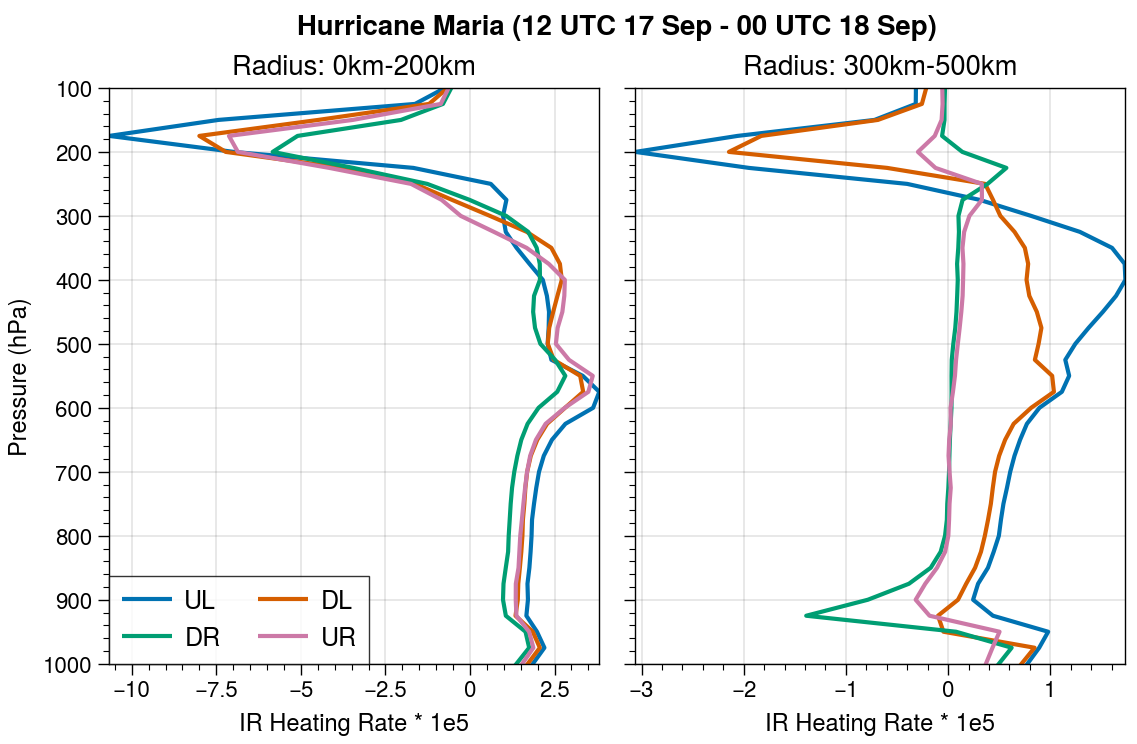

In [67]:
fig,axs = plot.subplots(ncols=2,nrows=1,axwidth=2.45,refaspect=0.851,span=False)

axs[0].plot(IRctrl_uliprof*1e5,coor.pres,lw=1.5,label='UL')
axs[0].plot(QVctrl_dliprof*1e5,coor.pres,lw=1.5,label='DL')
axs[0].plot(QVctrl_driprof*1e5,coor.pres,lw=1.5,label='DR')
axs[0].plot(QVctrl_uriprof*1e5,coor.pres,lw=1.5,label='UR')
axs[0].format(title='Radius: 0km-200km')
axs[0].legend(loc='ll',ncols=2)
axs[1].plot(IRctrl_uloprof*1e5,coor.pres,lw=1.5,label='UL')
axs[1].plot(QVctrl_dloprof*1e5,coor.pres,lw=1.5,label='DL')
axs[1].plot(QVctrl_droprof*1e5,coor.pres,lw=1.5,label='DR')
axs[1].plot(QVctrl_uroprof*1e5,coor.pres,lw=1.5,label='UR')
axs[1].format(title='Radius: 300km-500km')

axs.format(xlabel='IR Heating Rate * 1e5',ylabel='Pressure (hPa)',\
           suptitle='Hurricane Maria (12 UTC 17 Sep - 00 UTC 18 Sep)',ylim=[1000,100])
for axisobj in axs:
    axisobj.yaxis.label.set_size(8.5)
    axisobj.xaxis.label.set_size(8.5)
    axisobj.tick_params(axis='both', which='major', labelsize=8)
plt.show()